<a href="https://colab.research.google.com/github/sergiyromanenko/CV-HW/blob/master/lesson_10/homework/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 10

In this homework, you are going to use and compare two different trackers (of your liking) and compare the results.

### Step 1
Decide what video you are going to use for this homework, select an object and generate the template. You can use any video you want (your own, from Youtube, etc.)
and track any object you want (e.g. a car, a pedestrian, etc.).


In [44]:
cd CV-HW/lesson_10/homework

/content/CV-HW/lesson_10/homework


In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [48]:
!wget   https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4

--2024-03-03 20:00:12--  https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4
Resolving www.bogotobogo.com (www.bogotobogo.com)... 173.254.30.214
Connecting to www.bogotobogo.com (www.bogotobogo.com)|173.254.30.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2018126 (1.9M) [video/mp4]
Saving to: ‘slow_traffic_small.mp4’

slow_traffic_small. 100%[===================>]   1.92M  --.-KB/s    in 0.09s   

2024-03-03 20:00:12 (22.2 MB/s) - ‘slow_traffic_small.mp4’ saved [2018126/2018126]



I will detect all vehicles using the Haar Cascade classifier.
I will able to change cars for tracking.

I load trained XML Haar Cascad classifier (cars1.xml) that contains the features to identify the objects.

File cars1.xml source: https://github.com/Bhuribhat/Vehicle-Detection-Project?tab=readme-ov-file

In [49]:
!wget https://raw.githubusercontent.com/afzal442/Real-Time_Vehicle_Detection-as-Simple/master/cars.xml -O cars1.xml

haar_cascade = 'cars1.xml'
car_cascade = cv2.CascadeClassifier(haar_cascade)

--2024-03-03 20:00:20--  https://raw.githubusercontent.com/afzal442/Real-Time_Vehicle_Detection-as-Simple/master/cars.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118803 (116K) [text/plain]
Saving to: ‘cars1.xml’

cars1.xml           100%[===================>] 116.02K  --.-KB/s    in 0.03s   

2024-03-03 20:00:21 (3.72 MB/s) - ‘cars1.xml’ saved [118803/118803]



Detect a cars

[[309  62  67  67]
 [256  77  63  63]
 [208 103  90  90]
 [290 147  90  90]
 [307 187 109 109]
 [271 189 104 104]]


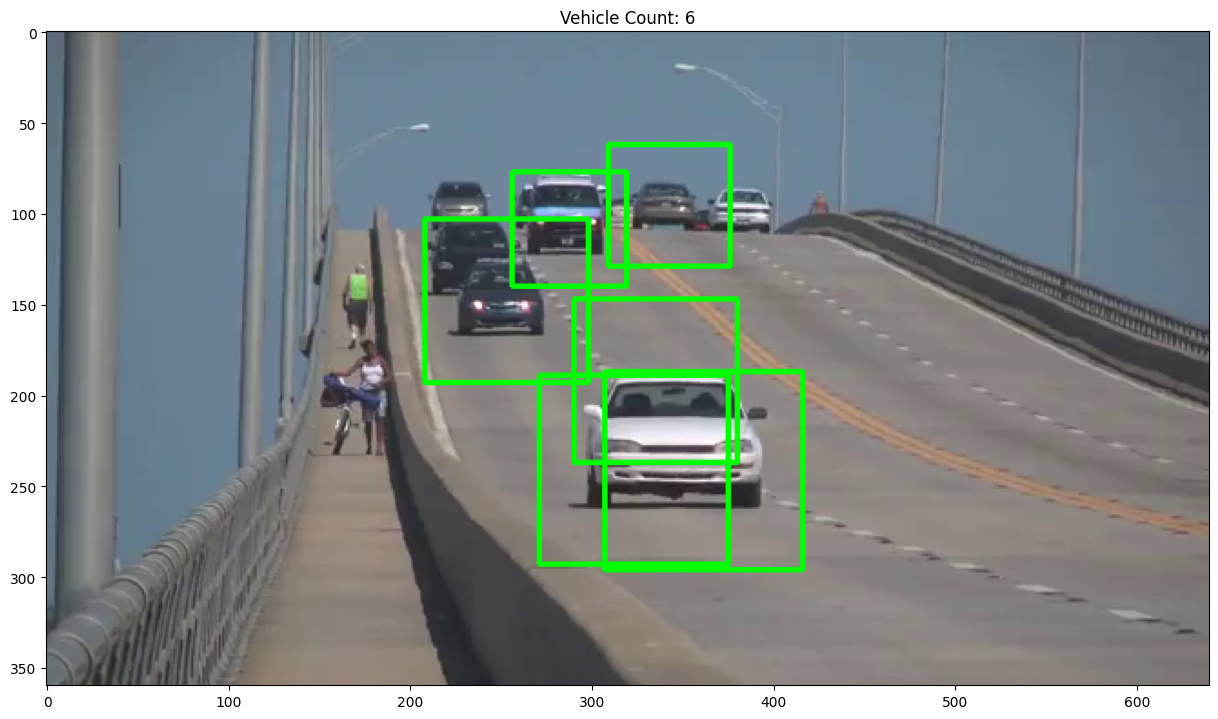

In [50]:
# Colors
GREEN = (0, 255, 0)

# Configuration Car Size
min_width  = 50
min_height = 50

# Create Car Classifier
CLF = cv2.CascadeClassifier('cars1.xml')

def detect_car_model(image_bgr):
    result = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    gray   = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    blur   = cv2.GaussianBlur(gray, (3, 3), 5)

    # Pass frame to our car classifier
    cars = CLF.detectMultiScale(
        blur,
        scaleFactor = 1.1,    # how much the image size is reduced at each image scale
        minNeighbors = 2,     # how many neighbors each candidate rectangle should have to retain it
        minSize = (min_width, min_height)
    )
    print(cars)
    # Extract bounding boxes for any car identified
    for x, y, w, h in cars:
        cv2.rectangle(result, (x, y), (x + w, y + h), GREEN, 2)

    plt.imshow(result)
    plt.title(f"Vehicle Count: {len(cars)}")
    plt.show()
    return cars


cap = cv2.VideoCapture('slow_traffic_small.mp4')
ret, frame = cap.read()
cars = detect_car_model(frame)

So I can change cars for tracking

In [51]:
# [x,y,width,height]
print(cars[1])

[256  77  63  63]



### Step 2
Functions to Initialize trackers (MIL, KCF, CSRT) and update tracker

In [70]:
def tracker_init(img, bbox, tracker_type):

  if tracker_type == 'MIL':
      tracker = cv2.TrackerMIL_create()

  if tracker_type == 'KCF':
      tracker = cv2.TrackerKCF_create()

  if tracker_type == "CSRT":
      tracker = cv2.TrackerCSRT_create()

  # Initialize tracker
  ok = tracker.init(img, bbox)
  return tracker


def tracker_update(tracker, img):
  ok, bbox = tracker.update(img)
  #print(ok, bbox)
  x1, y1 = bbox[0], bbox[1]
  width, height = bbox[2], bbox[3]
  return x1, y1, x1+width, y1+height

### Step 3
Run the tracker on the video and the selected object. Run the tracker for around 10-15 frames.

Step4

For each frame, print the bounding box on the image and save it.

In [71]:
import moviepy.editor
from IPython.display import display, HTML

def tracker_show(tracker_type, video_output_file_name):
    cap = cv2.VideoCapture('slow_traffic_small.mp4')
    if not cap.isOpened():
        print("Failed to open video")


    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_output_file_name, fourcc, fps, (width, height))


    # change cars for tracking here
    bbox = cars[1]  # [x,y,width,height]
    ret, frame = cap.read()
    tracker = tracker_init(frame, bbox, tracker_type)

    cv2.rectangle(frame, (cars[1][0], cars[1][1]), (cars[1][0]+ cars[1][2], cars[1][1] + cars[1][3]), (0, 255, 0), 2)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.show(), plt.draw()

    frame_count = 0
    frame_interval = 5  # Read every 5th frame

    while(cap.isOpened()):
        ret, frame = cap.read()
        if not ret:
            break

        if ret==True:
          frame_count+= 1

          if frame_count % frame_interval == 0:
              x1, y1, x2, y2 = tracker_update(tracker, frame)
              #print(x1, y1, x2, y2 )
              cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
              frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

              # Show frame or play video

              # plt.imshow(frame)
              # plt.show(), plt.draw()

              # Write the frame into the output video file
              frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
              out.write(frame)

        else:
          break




    # Release everything if job is finished
    cap.release()
    out.release()






In [54]:
    # Set tracker
    tracker_types = ['MIL','KCF', 'CSRT']


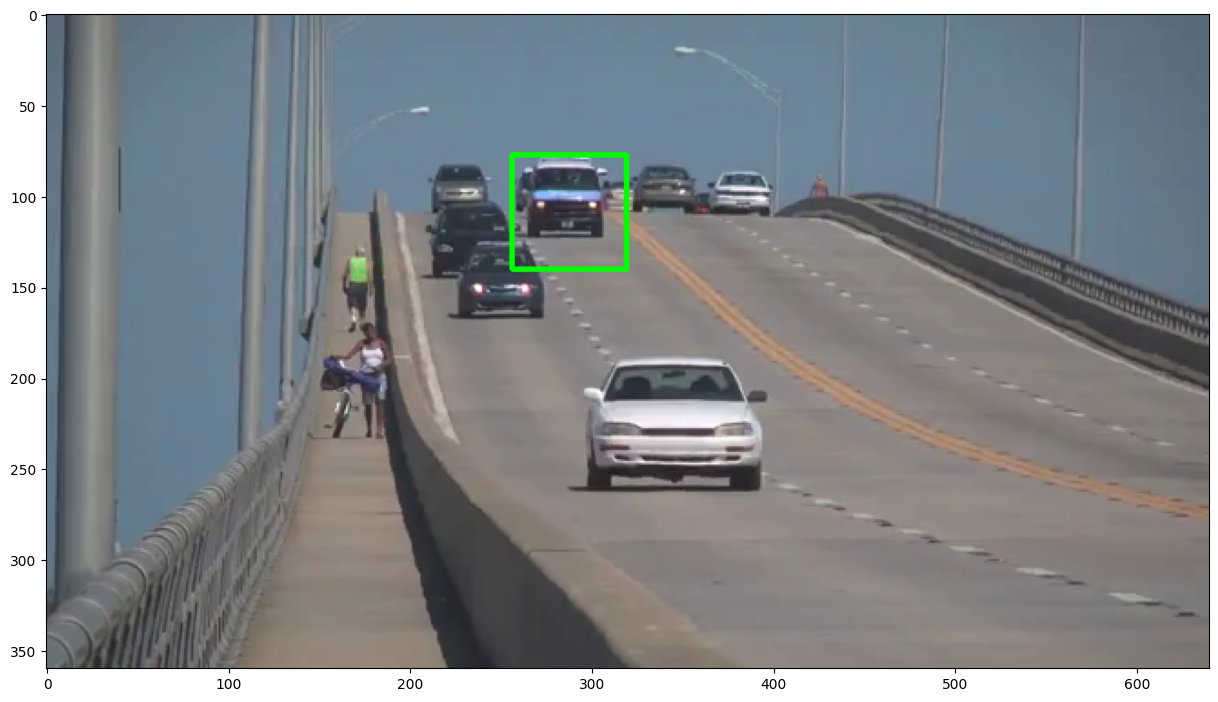

<Figure size 1500x1000 with 0 Axes>

In [67]:
tracker_show('MIL','MIL_video_output.mp4')

In [73]:
ls -al MIL_video_output.mp4

-rw-r--r-- 1 root root 1402937 Mar  3 20:11 MIL_video_output.mp4


###  Step 5
Select a different tracker (e.g. CSRT) and repeat steps 2, 3 and 4.

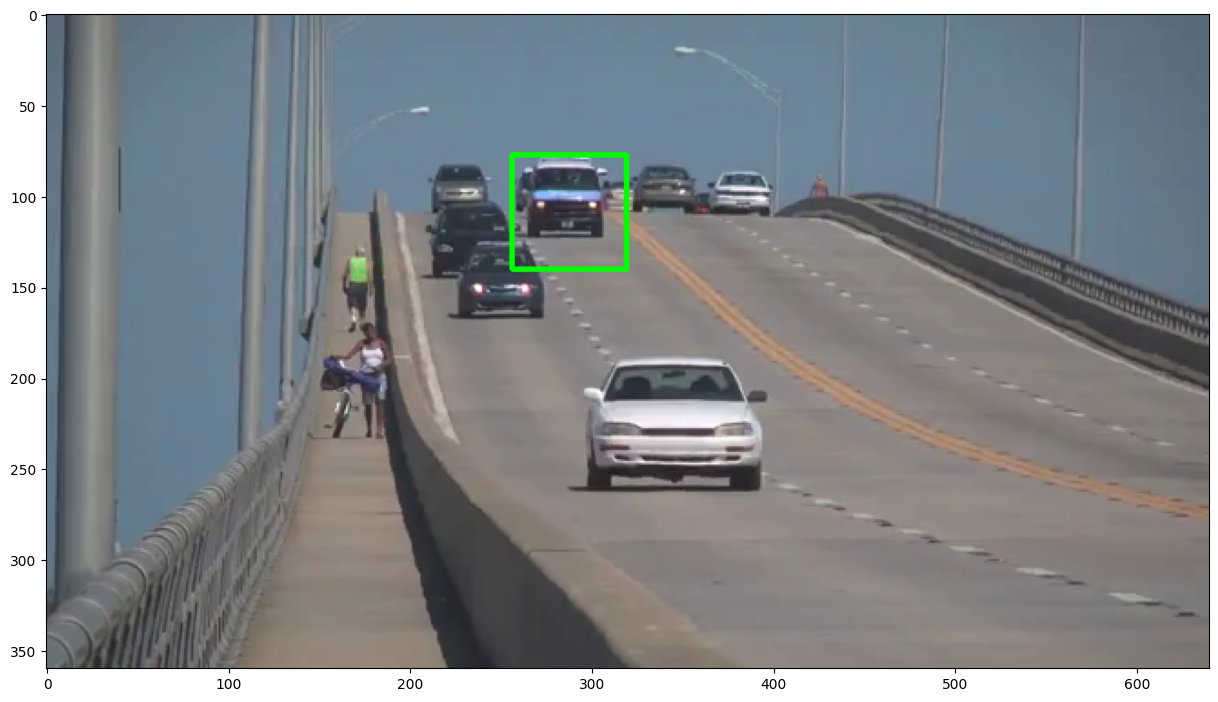

<Figure size 1500x1000 with 0 Axes>

In [72]:
tracker_show('CSRT','CSRT_video_output.mp4')

In [74]:
ls -al CSRT_video_output.mp4

-rw-r--r-- 1 root root 1320699 Mar  3 20:12 CSRT_video_output.mp4


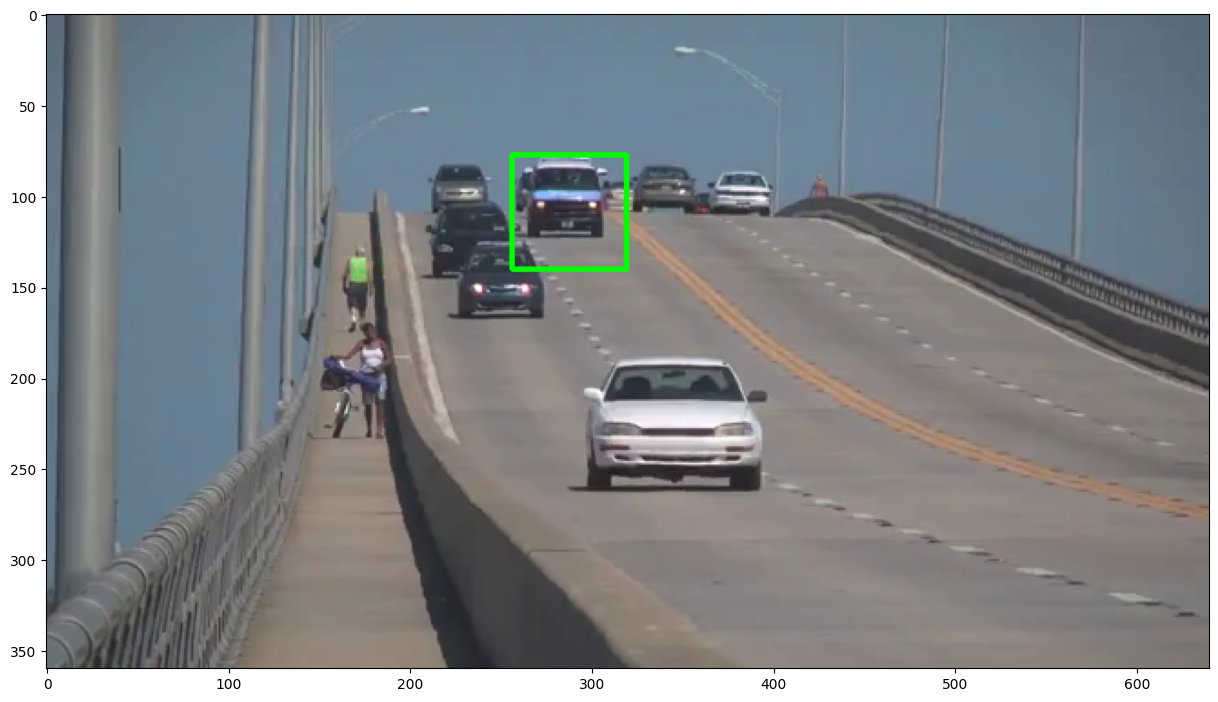

<Figure size 1500x1000 with 0 Axes>

In [69]:
tracker_show('KCF','KCF_video_output.mp4')

In [75]:
ls -al KCF_video_output.mp4

-rw-r--r-- 1 root root 1288350 Mar  3 20:11 KCF_video_output.mp4


###  Step 6
Compare the results:

Do you see any differences? If so, what are they?
Does one tracker perform better than the other? In what way?